In [62]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

# ***LOAD THE DATASET***

In [ ]:
# Dataset Link: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
# To run the code cells please uplad the notebook and dataset in Kaggle. If You want to run in any other platform or code editor please upload the dataset and update the '/kaggle/input' as the required path

In [63]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [64]:
# Creating a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear


# ***FEATURE EXTRACTION***

In [65]:
# Function to extract features from audio file
def extract_features(audio_path):
    # Loading audio file
    y, sr = librosa.load(audio_path, sr=16000)  # Resample to 16kHz
    
    # Extracting MFCC features and energy
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    energy = librosa.feature.rms(y=y)
    
    # Combining energy and MFCC features
    features = np.vstack((energy, mfcc))
    
    return features.T  # Transpose to have features in rows

In [66]:
# Defining the parameters
frame_size = 0.025  # Duration for each frame in seconds
segment_size = 25   # Number of frames per segment
hop_size = 13        # Number of overlapping frames per segment


In [67]:
# Initializing an empty list to store features and labels
all_features = []
labels = []

# Iterate through each row in the dataframe
for index, row in df.iterrows():
    audio_path = row['speech']  # Get the path of the audio file
    emotion_label = row['label']  # Get the emotion label
    
    # Extract features from the audio file
    features = extract_features(audio_path)
    
    # Divide features into segments
    num_frames = features.shape[0]
    for start in range(0, num_frames - segment_size + 1, hop_size):
        end = start + segment_size
        segment = features[start:end, :]
        
        # Append segment features and label
        segment_features = {}
        for i in range(segment.shape[1]):
            if i == 0:
                segment_features[f'energy'] = np.mean(segment[:, i])
            else:
                segment_features[f'mfcc_{i}'] = np.mean(segment[:, i])
        
        all_features.append(segment_features)
        labels.append(emotion_label)

# Create a dataframe from the features and labels
df_features = pd.DataFrame(all_features)
df_features['label'] = labels

# Display the resulting dataframe
print(df_features.head())

     energy      mfcc_1     mfcc_2     mfcc_3     mfcc_4     mfcc_5  \
0  0.115321 -196.774124  74.801132  12.267655  27.150080  -1.793359   
1  0.128519 -220.193497  84.780281  -4.349119   8.757315 -20.772871   
2  0.046512 -304.405670  36.994686   5.466257  18.320864  -7.123263   
3  0.066173 -287.081848  42.575493 -15.722372  22.373543  -6.458248   
4  0.054960 -325.551666  12.183926 -15.933782  25.920761  -1.754756   

      mfcc_6     mfcc_7     mfcc_8     mfcc_9    mfcc_10    mfcc_11  \
0   2.558174  -3.152933  -5.413880  -3.198786 -17.005478   0.871456   
1  18.640406   2.419398   0.817313  12.895338 -12.450620 -11.655116   
2  -7.181653  -0.693719 -14.568731  -7.757457  -8.345502   6.055524   
3  -7.834227  -9.640331 -21.665773  -9.357491 -17.971601  -2.261276   
4  -9.770431 -12.300290 -23.702978 -12.270916 -10.733944  -9.556016   

     mfcc_12    mfcc_13 label  
0   1.398022   2.807527  fear  
1  12.784367 -13.897034  fear  
2   3.352101  -1.653703  fear  
3  -0.306280  -5.8

In [70]:
df_features.head()

,energy,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,label
0,0.115321,-196.774124,74.801132,12.267655,27.150080,-1.793359,2.558174,-3.152933,-5.413880,-3.198786,-17.005478,0.871456,1.398022,2.807527,fear
1,0.128519,-220.193497,84.780281,-4.349119,8.757315,-20.772871,18.640406,2.419398,0.817313,12.895338,-12.450620,-11.655116,12.784367,-13.897034,fear
2,0.046512,-304.405670,36.994686,5.466257,18.320864,-7.123263,-7.181653,-0.693719,-14.568731,-7.757457,-8.345502,6.055524,3.352101,-1.653703,fear
3,0.066173,-287.081848,42.575493,-15.722372,22.373543,-6.458248,-7.834227,-9.640331,-21.665773,-9.357491,-17.971601,-2.261276,-0.306280,-5.831062,fear
4,0.054960,-325.551666,12.183926,-15.933782,25.920761,-1.754756,-9.770431,-12.300290,-23.702978,-12.270916,-10.733944,-9.556016,1.574557,-3.404309,fear


*Performing Label Encoding for different emotions*

In [71]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# 'label' encoding
df_features['label_encoded'] = label_encoder.fit_transform(df_features['label'])



In [72]:
df_features.head()

,energy,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,label,label_encoded
0,0.115321,-196.774124,74.801132,12.267655,27.150080,-1.793359,2.558174,-3.152933,-5.413880,-3.198786,-17.005478,0.871456,1.398022,2.807527,fear,2
1,0.128519,-220.193497,84.780281,-4.349119,8.757315,-20.772871,18.640406,2.419398,0.817313,12.895338,-12.450620,-11.655116,12.784367,-13.897034,fear,2
2,0.046512,-304.405670,36.994686,5.466257,18.320864,-7.123263,-7.181653,-0.693719,-14.568731,-7.757457,-8.345502,6.055524,3.352101,-1.653703,fear,2
3,0.066173,-287.081848,42.575493,-15.722372,22.373543,-6.458248,-7.834227,-9.640331,-21.665773,-9.357491,-17.971601,-2.261276,-0.306280,-5.831062,fear,2
4,0.054960,-325.551666,12.183926,-15.933782,25.920761,-1.754756,-9.770431,-12.300290,-23.702978,-12.270916,-10.733944,-9.556016,1.574557,-3.404309,fear,2


*To find out the unique label_encoded code for each emotion.*

In [74]:
# Extracting and Displaying unique emotions and their corresponding labels
unique_emotions = df_features[['label', 'label_encoded']].drop_duplicates()

print(unique_emotions)


        label  label_encoded
0        fear              2
566     angry              0
1544  disgust              1
2403  neutral              4
3853      sad              6
6518       ps              5
7231    happy              3


In [78]:
# Sorting and displaying the unique emotions by 'label_encoded' in ascending order
unique_emotions_sorted = unique_emotions.sort_values(by='label_encoded')

print(unique_emotions_sorted)


        label  label_encoded
566     angry              0
1544  disgust              1
0        fear              2
7231    happy              3
2403  neutral              4
6518       ps              5
3853      sad              6


In [ ]:
# From unique_emotions_sorted dataframe we got to know that 0 represents angry,1 represents disgust,2 represents fear, 3 represents happy,4 represents neutral, 5 represents pleasent surprise i.e ps and 6 represents sad.

In [79]:
unique_emotions_sorted

,label,label_encoded
566,angry,0
1544,disgust,1
0,fear,2
7231,happy,3
2403,neutral,4
6518,ps,5
3853,sad,6


*One hot encoding*

In [80]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

# Reshaping the 'label' column to a 2D array
labels_2d = df_features['label'].values.reshape(-1, 1)

# Fit and transform the 'label' column
labels_encoded = encoder.fit_transform(labels_2d)

# Converting the encoded labels to an array
labels_array = labels_encoded.toarray()

# Creating a DataFrame encoded_labels_df with the encoded labels
encoded_labels_df = pd.DataFrame(labels_array, columns=encoder.categories_[0])

# Concatenating the  encoded_df and the encoded labels encoded_labels_df DataFrame
encoded_df = pd.concat([df_features.drop(columns=['label']), encoded_labels_df], axis=1)




In [81]:
encoded_df.head()

,energy,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,...,mfcc_12,mfcc_13,label_encoded,angry,disgust,fear,happy,neutral,ps,sad
0,0.115321,-196.774124,74.801132,12.267655,27.150080,-1.793359,2.558174,-3.152933,-5.413880,-3.198786,...,1.398022,2.807527,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.128519,-220.193497,84.780281,-4.349119,8.757315,-20.772871,18.640406,2.419398,0.817313,12.895338,...,12.784367,-13.897034,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.046512,-304.405670,36.994686,5.466257,18.320864,-7.123263,-7.181653,-0.693719,-14.568731,-7.757457,...,3.352101,-1.653703,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.066173,-287.081848,42.575493,-15.722372,22.373543,-6.458248,-7.834227,-9.640331,-21.665773,-9.357491,...,-0.306280,-5.831062,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.054960,-325.551666,12.183926,-15.933782,25.920761,-1.754756,-9.770431,-12.300290,-23.702978,-12.270916,...,1.574557,-3.404309,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [82]:
df_features.head()

,energy,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,label,label_encoded
0,0.115321,-196.774124,74.801132,12.267655,27.150080,-1.793359,2.558174,-3.152933,-5.413880,-3.198786,-17.005478,0.871456,1.398022,2.807527,fear,2
1,0.128519,-220.193497,84.780281,-4.349119,8.757315,-20.772871,18.640406,2.419398,0.817313,12.895338,-12.450620,-11.655116,12.784367,-13.897034,fear,2
2,0.046512,-304.405670,36.994686,5.466257,18.320864,-7.123263,-7.181653,-0.693719,-14.568731,-7.757457,-8.345502,6.055524,3.352101,-1.653703,fear,2
3,0.066173,-287.081848,42.575493,-15.722372,22.373543,-6.458248,-7.834227,-9.640331,-21.665773,-9.357491,-17.971601,-2.261276,-0.306280,-5.831062,fear,2
4,0.054960,-325.551666,12.183926,-15.933782,25.920761,-1.754756,-9.770431,-12.300290,-23.702978,-12.270916,-10.733944,-9.556016,1.574557,-3.404309,fear,2


In [16]:
# df_features has label_encoded emotions
# encoded_df has one hot encoded and label encoded emotions

# ***ML MODELS***

In [85]:
X = df_features.iloc[:, 0:13].values
y = df_features.iloc[:, -1].values

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [87]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc=  sc.transform(X_test)

In [20]:
# X_train_sc and X_test_sc containes values after applying feature scaling on X_train and X_test

In [88]:
print(X_train)

[[ 2.10091956e-02 -4.75501160e+02  1.01541618e+02 ... -1.22775393e+01
  -7.67486525e+00 -8.06077957e+00]
 [ 2.05540918e-02 -3.74115356e+02  3.87690239e+01 ... -9.52424335e+00
  -1.12874489e+01  2.85673046e+00]
 [ 3.40580717e-02 -3.89038239e+02  5.93107376e+01 ... -2.01170731e+01
   8.33560658e+00  4.09546041e+00]
 ...
 [ 6.60088733e-02 -2.65930786e+02 -3.03250465e+01 ... -1.37027311e+01
   7.84154558e+00 -1.00049353e+01]
 [ 3.68244015e-02 -2.97626770e+02  1.59124594e+01 ...  1.14779949e+00
   6.93722486e+00 -2.38131595e+00]
 [ 1.53946653e-02 -5.04464844e+02  1.03589500e+02 ... -1.07569895e+01
  -8.41642559e-01 -1.05928099e+00]]


In [89]:
print(X_train_sc)

[[-0.51388496 -1.0260522   0.8840812  ... -0.3152307  -0.6907168
  -0.78095067]
 [-0.53418726  0.20447285 -0.61085474 ...  0.06600128 -1.1113639
   0.88235784]
 [ 0.06822807  0.02335301 -0.12165168 ... -1.4007227   1.1735333
   1.0710813 ]
 ...
 [ 1.49356     1.5175151  -2.2563374  ... -0.5125683   1.1160051
  -1.0771474 ]
 [ 0.1916346   1.132819   -1.1551862  ...  1.5436937   1.0107065
   0.08432908]
 [-0.7643503  -1.3775861   0.93285173 ... -0.10468951  0.10493971
   0.28574425]]


In [90]:
print(y_train)

[6 3 4 ... 0 5 4]


***SVM***

Training the SVM model

In [91]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear')
classifier.fit(X_train_sc, y_train)

SVC(kernel='linear')

*Accuracy On Training Set and Test Set*

In [92]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Predicting labels for training and test sets
y_train_pred_svc = classifier.predict(X_train_sc)
y_test_pred_svc = classifier.predict(X_test_sc)

# Calculating accuracy for training and test sets
train_accuracy = accuracy_score(y_train, y_train_pred_svc)
test_accuracy = accuracy_score(y_test, y_test_pred_svc)

print("Training Set Accuracy:", train_accuracy)
print("Test Set Accuracy:", test_accuracy)

Training Set Accuracy: 0.7798507462686567
Test Set Accuracy: 0.7691542288557214


*Plot Of Confusion Matrix and bar graph*

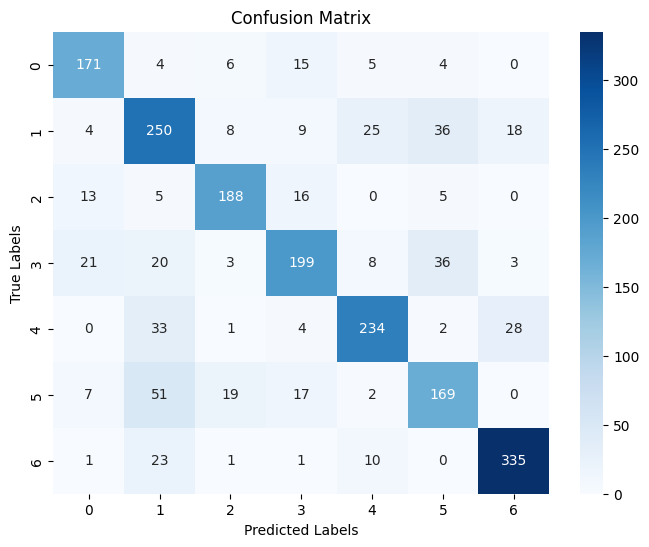

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting confusion matrix for test set
conf_matrix_svc = confusion_matrix(y_test, y_test_pred_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [27]:
# In this confusion matrix 0 represents angry,1 represents disgust,2 represents fear, 3 represents happy,4 represents neutral, 5 represents pleasent surprise i.e ps and 6 represents sad.

In [95]:
unique_emotions_sorted

,label,label_encoded
566,angry,0
1544,disgust,1
0,fear,2
7231,happy,3
2403,neutral,4
6518,ps,5
3853,sad,6


In [97]:
# Calculate accuracy for each label
accuracies = np.diag(conf_matrix_svc) / conf_matrix_svc.sum(axis=1)

# Define emotion labels
emotion_labels = ["angry", "disgust", "fear", "happy", "neutral", "surprise", "sad"]

# Display accuracies
for label, accuracy in enumerate(accuracies):
    print(f"accuracy of predicting {emotion_labels[label]} i.e {label} correctly = {accuracy:.2%}")


accuracy of predicting angry i.e 0 correctly = 83.41%
accuracy of predicting disgust i.e 1 correctly = 71.43%
accuracy of predicting fear i.e 2 correctly = 82.82%
accuracy of predicting happy i.e 3 correctly = 68.62%
accuracy of predicting neutral i.e 4 correctly = 77.48%
accuracy of predicting surprise i.e 5 correctly = 63.77%
accuracy of predicting sad i.e 6 correctly = 90.30%


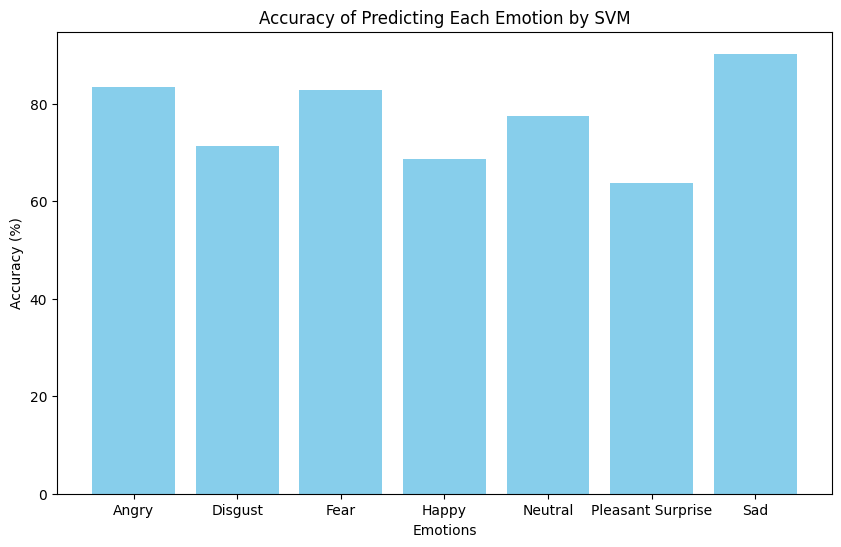

In [98]:
import matplotlib.pyplot as plt

# Labels for each class
classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Pleasant Surprise', 'Sad']

# Accuracies for each class
accuracies = [83.41,71.43,82.82,68.62,77.48,63.77,90.30]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(classes, accuracies, color='skyblue')

# Adding labels and title
plt.xlabel('Emotions')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Predicting Each Emotion by SVM')

# Displaying the plot
plt.show()


# Gradient Boosting

*Training the model*

In [99]:
from sklearn.ensemble import GradientBoostingClassifier

# Defining the GradientBoostingClassifier with specified hyperparameters as in the research paper
gbc = GradientBoostingClassifier(loss='deviance',learning_rate=0.15,n_estimators=120,max_depth=4)

# Fit the model to the training data
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.15, loss='deviance', max_depth=4,
                           n_estimators=120)

*Accuracy On Training Set and Test Set*


In [100]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Predicting labels for training and test sets
y_train_pred_gbc = gbc.predict(X_train)
y_test_pred_gbc = gbc.predict(X_test)

# Calculating accuracy for training and test sets
train_accuracy = accuracy_score(y_train, y_train_pred_gbc)
test_accuracy = accuracy_score(y_test, y_test_pred_gbc)

print("Training Set Accuracy:", train_accuracy)
print("Test Set Accuracy:", test_accuracy)

Training Set Accuracy: 1.0
Test Set Accuracy: 0.9074626865671642


*Plot Of Confusion Matrix and barg raph*

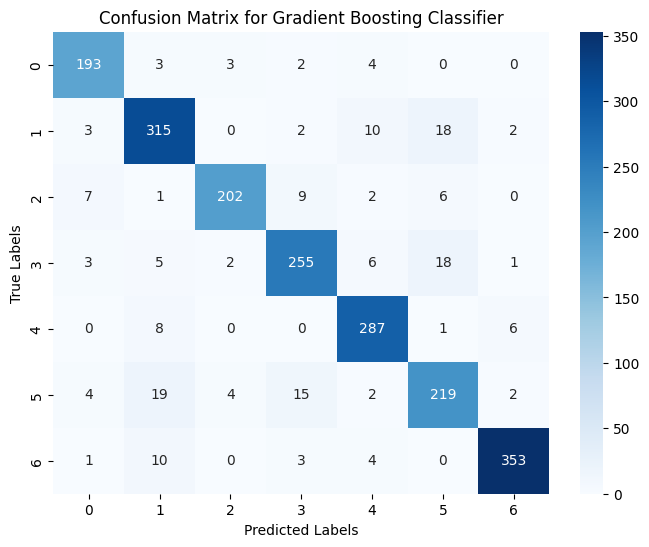

In [101]:
# Calculating confusion matrix for test set
conf_matrix_gbc = confusion_matrix(y_test, y_test_pred_gbc)

# Plotting confusion matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gbc, annot=True, fmt='d', cmap='Blues',xticklabels=gbc.classes_, yticklabels=gbc.classes_)
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [36]:
# In this confusion matrix 0 represents angry,1 represents disgust,2 represents fear, 3 represents happy,4 represents neutral, 5 represents pleasent surprise i.e ps and 6 represents sad.

In [103]:
# Calculating accuracy for each label
accuracies = np.diag(conf_matrix_gbc) / conf_matrix_gbc.sum(axis=1)

# Defining emotion labels
emotion_labels = ["angry", "disgust", "fear", "happy", "neutral", "surprise", "sad"]


for label, accuracy in enumerate(accuracies):
    print(f"accuracy of predicting {emotion_labels[label]} i.e {label} correctly = {accuracy:.2%}")

accuracy of predicting angry i.e 0 correctly = 94.15%
accuracy of predicting disgust i.e 1 correctly = 90.00%
accuracy of predicting fear i.e 2 correctly = 88.99%
accuracy of predicting happy i.e 3 correctly = 87.93%
accuracy of predicting neutral i.e 4 correctly = 95.03%
accuracy of predicting surprise i.e 5 correctly = 82.64%
accuracy of predicting sad i.e 6 correctly = 95.15%


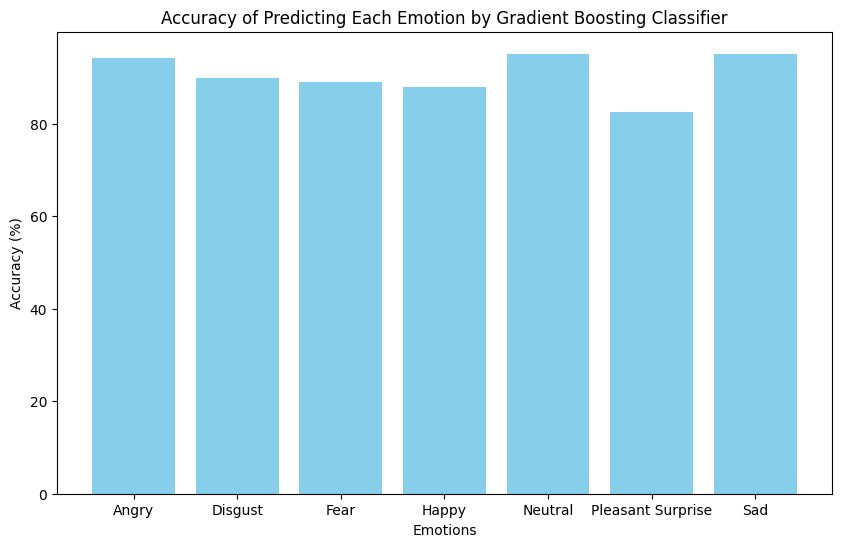

In [104]:
# Labels for each class
classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Pleasant Surprise', 'Sad']

# Accuracies for each class
accuracies = [94.15,90,88.99,87.93,95.03,82.64,95.15]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(classes, accuracies, color='skyblue')
plt.xlabel('Emotions')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Predicting Each Emotion by Gradient Boosting Classifier')
plt.show()


# Random Forest Classification

*Training The model*

In [106]:
from sklearn.ensemble import RandomForestClassifier

# Define the RandomForestClassifier with specified hyperparameters
classifier= RandomForestClassifier(n_estimators=15,criterion='gini',max_depth=None,random_state=100)
# Fit the model to the scaled training data
classifier.fit(X_train_sc, y_train)


RandomForestClassifier(n_estimators=15, random_state=100)

*Accuracy On Training Set and Test Set*

In [107]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Predicting labels for training and test sets
y_train_pred_rf = classifier.predict(X_train_sc)
y_test_pred_rf = classifier.predict(X_test_sc)

# Calculating accuracy for training and test sets
train_accuracy = accuracy_score(y_train, y_train_pred_rf)
test_accuracy = accuracy_score(y_test, y_test_pred_rf)

print("Training Set Accuracy:", train_accuracy)
print("Test Set Accuracy:", test_accuracy)

Training Set Accuracy: 0.9992537313432835
Test Set Accuracy: 0.8850746268656716


*Plot Of Confusion Matrix and Bar Graph*

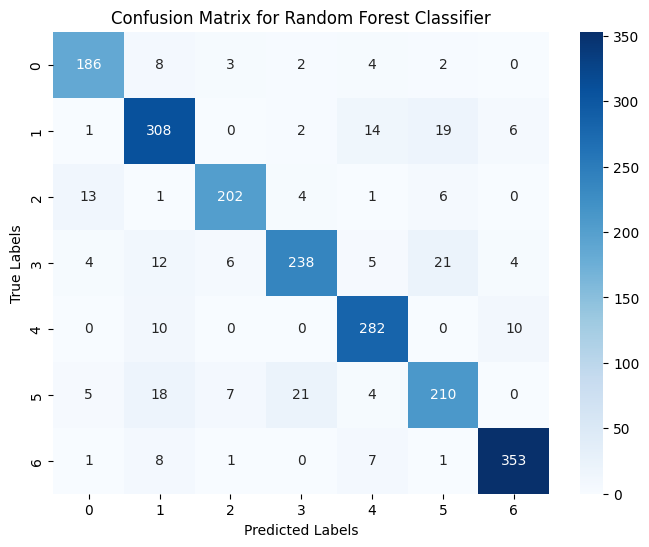

In [108]:
# Calculating confusion matrix for test set
conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)
# Plotting confusion matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues',xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [43]:
# In this confusion matrix 0 represents angry,1 represents disgust,2 represents fear, 3 represents happy,4 represents neutral, 5 represents pleasent surprise i.e ps and 6 represents sad.

In [109]:
# Calculating accuracy for each label
accuracies = np.diag(conf_matrix_rf) / conf_matrix_rf.sum(axis=1)

# Defining emotion labels
emotion_labels = ["angry", "disgust", "fear", "happy", "neutral", "surprise", "sad"]


for label, accuracy in enumerate(accuracies):
    print(f"accuracy of predicting {emotion_labels[label]} i.e {label} correctly = {accuracy:.2%}")

accuracy of predicting angry i.e 0 correctly = 90.73%
accuracy of predicting disgust i.e 1 correctly = 88.00%
accuracy of predicting fear i.e 2 correctly = 88.99%
accuracy of predicting happy i.e 3 correctly = 82.07%
accuracy of predicting neutral i.e 4 correctly = 93.38%
accuracy of predicting surprise i.e 5 correctly = 79.25%
accuracy of predicting sad i.e 6 correctly = 95.15%


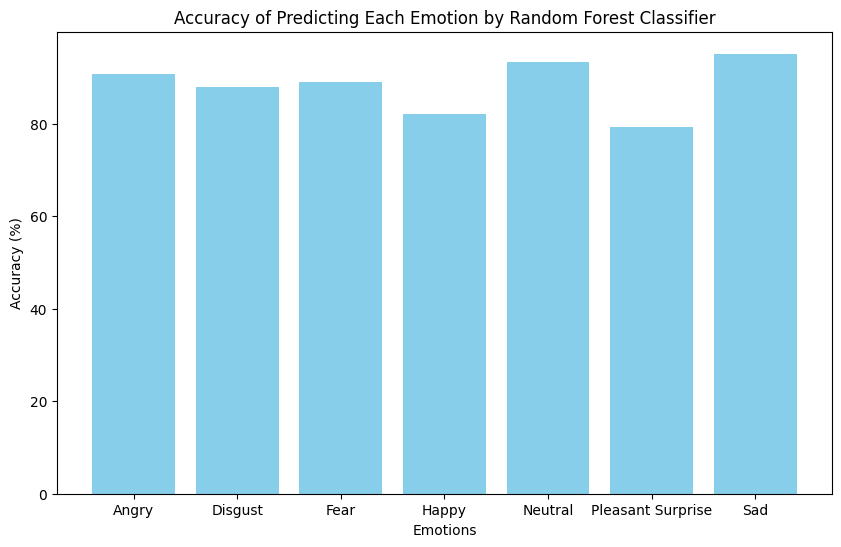

In [110]:
# Labels for each class
classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Pleasant Surprise', 'Sad']

# Accuracies for each class
accuracies = [90.73,88,88.99,82.07,93.38,79.25,95.15]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(classes, accuracies, color='skyblue')

# Adding labels and title
plt.xlabel('Emotions')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Predicting Each Emotion by Random Forest Classifier')

# Displaying the plot
plt.show()